# Stanford Car Dataset

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models. I have also added the scipy.io package and the loadmat from the same to work with MATLAB files.

In [2]:
from fastai import *
from fastai.vision import *
from scipy.io import loadmat

In [3]:
bs=64

## Looking at the data

We are going to use the data from https://ai.stanford.edu/~jkrause/cars/car_dataset.html. The images are in .tgz files and consist of train and test. There are files with details of bounding boxes (4 dimensions), class_id and image name corresponding to the bounding box and class_id. There is also a separate file that gives the name of the class corresponding to the class_id. The annotiation files (bounding box+class_id+filename for test, bounding box+filename for test and class_name+class_id) are in MATLAB format. They need to be converted in excel format.

In [5]:
path = Path('/home/ubuntu/.fastai/data/cars_train/')

In [6]:
path.ls()

['03838.jpg',
 '07139.jpg',
 '00949.jpg',
 '02267.jpg',
 '07862.jpg',
 '01235.jpg',
 '05548.jpg',
 '03423.jpg',
 '06843.jpg',
 '07252.jpg',
 '06288.jpg',
 '07186.jpg',
 '07267.jpg',
 '00115.jpg',
 '04605.jpg',
 '04814.jpg',
 '01457.jpg',
 '07127.jpg',
 '01238.jpg',
 '00734.jpg',
 '01885.jpg',
 '06625.jpg',
 '01753.jpg',
 '02284.jpg',
 '03688.jpg',
 '06158.jpg',
 '00002.jpg',
 '03483.jpg',
 '03167.jpg',
 '00010.jpg',
 '02978.jpg',
 '04629.jpg',
 '03058.jpg',
 '00595.jpg',
 '02250.jpg',
 '05555.jpg',
 '03604.jpg',
 '04452.jpg',
 '06072.jpg',
 '03388.jpg',
 '03591.jpg',
 '04285.jpg',
 '01045.jpg',
 '02686.jpg',
 '02003.jpg',
 '04651.jpg',
 '05321.jpg',
 '07902.jpg',
 '04199.jpg',
 '01412.jpg',
 '04560.jpg',
 '05257.jpg',
 '00917.jpg',
 '01981.jpg',
 '06314.jpg',
 '04792.jpg',
 '03991.jpg',
 '04223.jpg',
 '00376.jpg',
 '07569.jpg',
 '04997.jpg',
 '00426.jpg',
 '02560.jpg',
 '02769.jpg',
 '04299.jpg',
 '00996.jpg',
 '04660.jpg',
 '07355.jpg',
 '01772.jpg',
 '06241.jpg',
 '04532.jpg',
 '0405

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [7]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('/home/ubuntu/.fastai/data/cars_train/03838.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/cars_train/07139.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/cars_train/00949.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/cars_train/02267.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/cars_train/07862.jpg')]

In [8]:
len(fnames)

8144

In [9]:
# MAT = loadmat('cars_train_annos.mat')

In [10]:
# mat = {k:v for k, v in MAT.items() if k[0] != '_'}
# data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
# data.to_csv("example.csv")

The above code helps to take the details from MATLAB file and convert it to excel file. Then the excel file needs to cleansed to removed strings('array'), brackets('([])') and then take only the file name and class id. Then via Vlookup the class id has to be matched with class name. Then the labels.csv is made ready with only filename and classname

In [25]:
data = ImageDataBunch.from_csv(path=path,csv_labels='/home/ubuntu/.fastai/data/cars_train/labels.csv',ds_tfms=get_transforms(),size=224)
data.normalize(imagenet_stats)

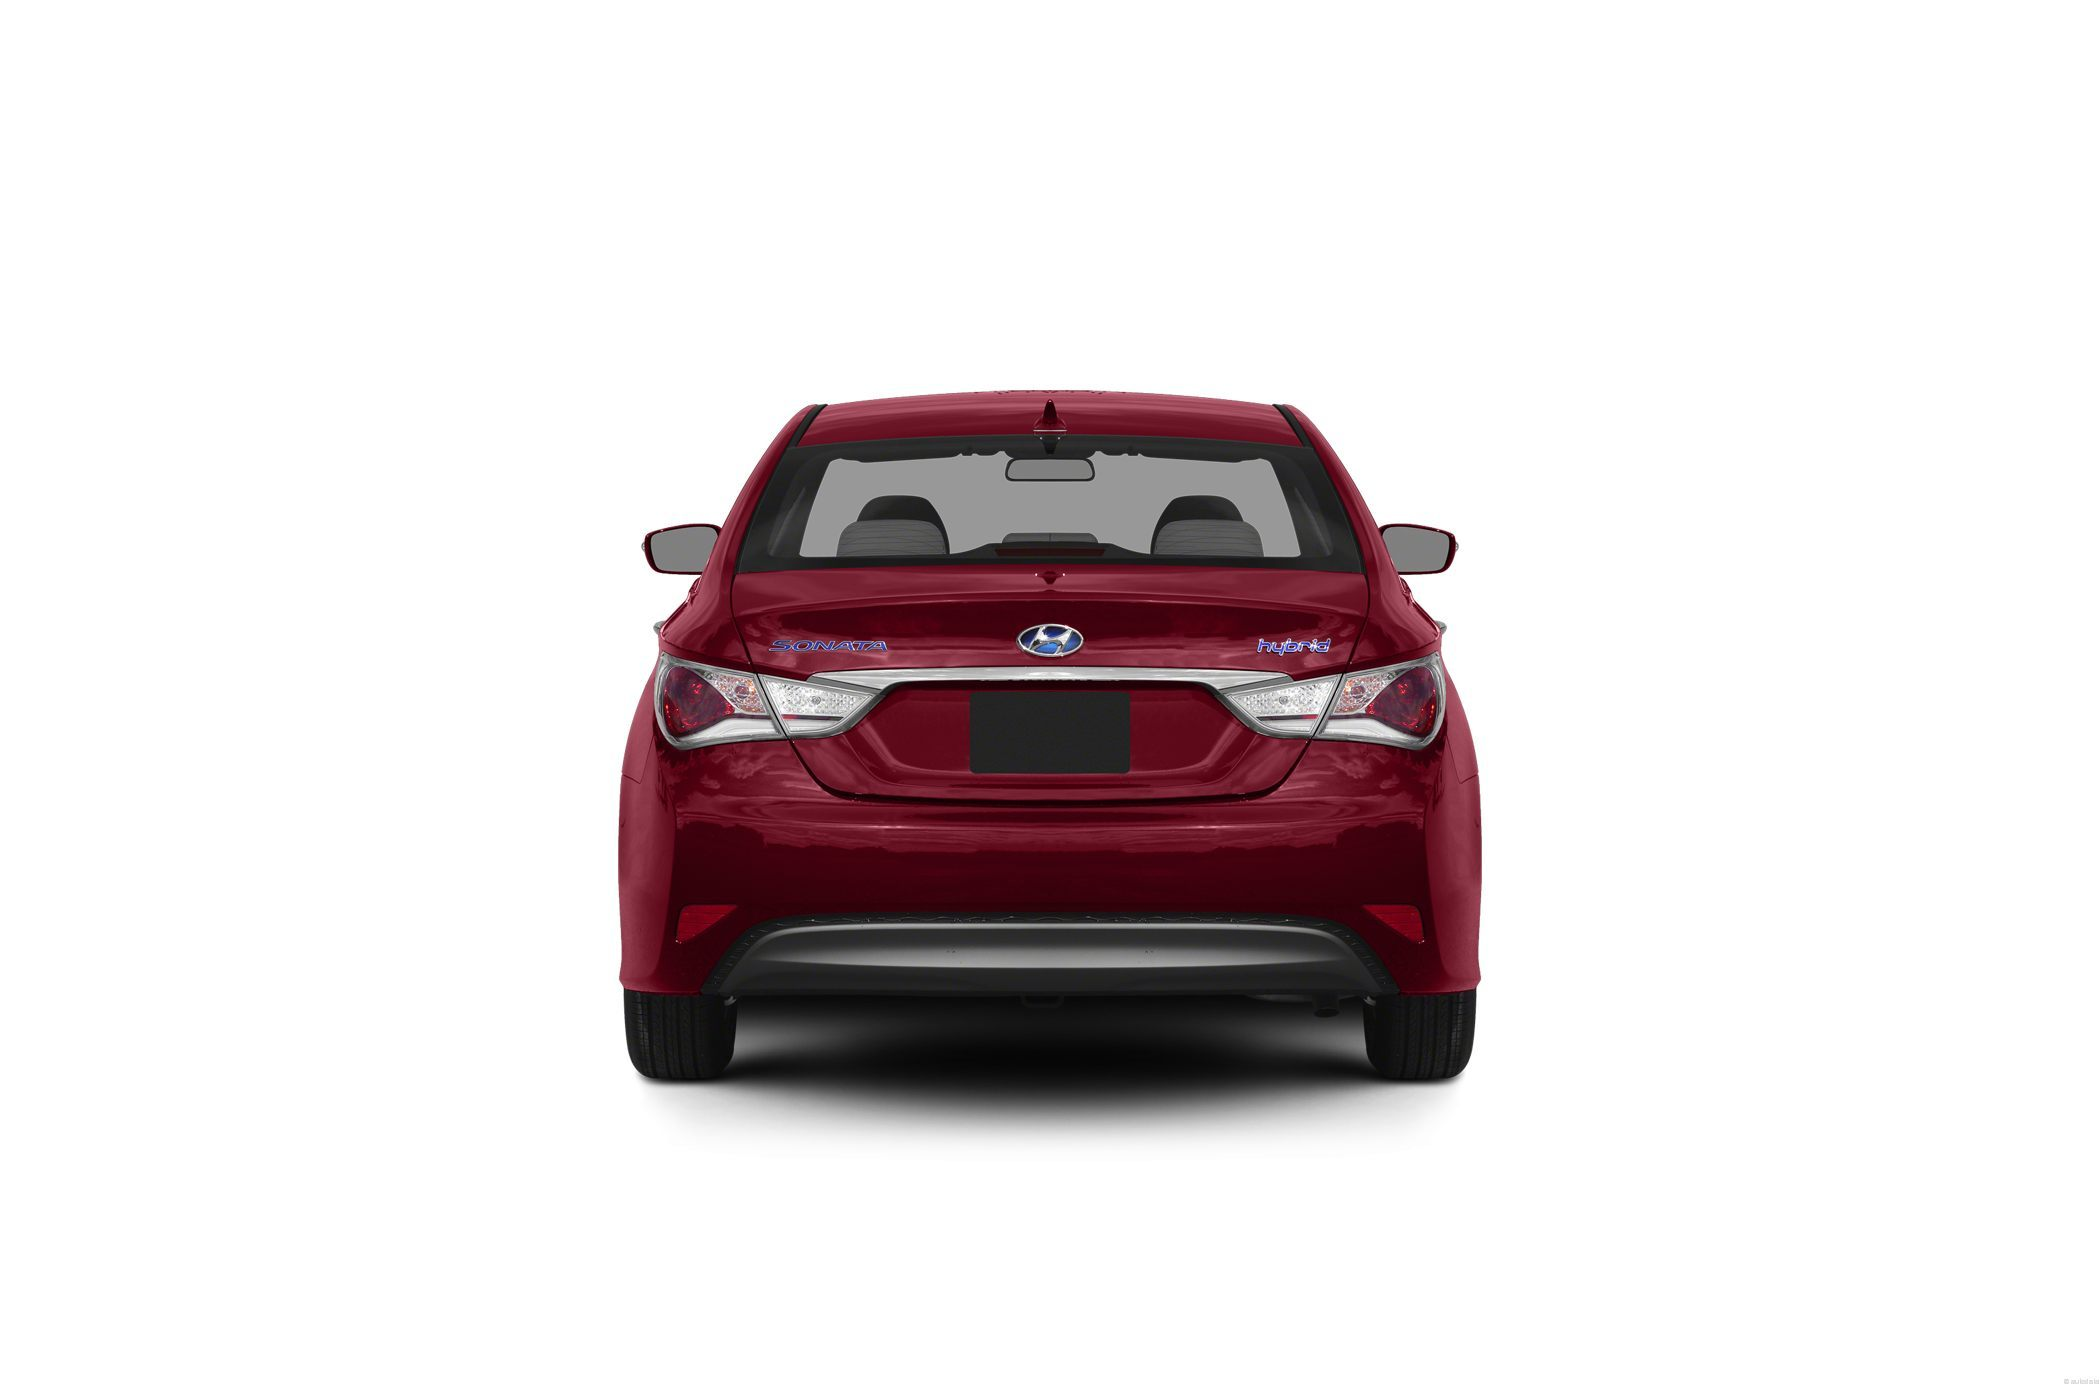

In [26]:
from PIL import Image
Image.open('/home/ubuntu/.fastai/data/cars_train/00004.jpg')

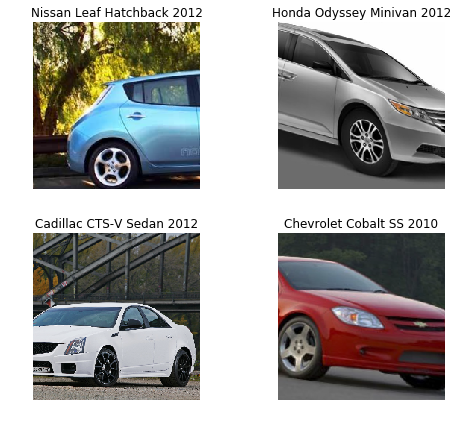

In [27]:
data.show_batch(rows=2,figsize=(7,6))

In [28]:
len(data.train_ds),len(data.train_dl)

(6510, 102)

In [29]:
len(data.valid_ds),len(data.valid_dl)

(1634, 13)

In [30]:
6510+1634

8144

In [31]:
data.loss_func

<function torch.nn.functional.cross_entropy(input, target, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='elementwise_mean')>

In [32]:
print(data.classes)
len(data.classes),data.c

['Audi TTS Coupe 2012', 'Acura TL Sedan 2012', 'Dodge Dakota Club Cab 2007', 'Hyundai Sonata Hybrid Sedan 2012', 'Ford F-450 Super Duty Crew Cab 2012', 'Geo Metro Convertible 1993', 'Dodge Journey SUV 2012', 'Dodge Charger Sedan 2012', 'Mitsubishi Lancer Sedan 2012', 'Chevrolet Traverse SUV 2012', 'Buick Verano Sedan 2012', 'Toyota Sequoia SUV 2012', 'Hyundai Elantra Sedan 2007', 'Dodge Caravan Minivan 1997', 'Volvo C30 Hatchback 2012', 'Plymouth Neon Coupe 1999', 'Chevrolet Malibu Sedan 2007', 'Volkswagen Beetle Hatchback 2012', 'Chevrolet Corvette Ron Fellows Edition Z06 2007', 'Chrysler 300 SRT-8 2010', 'BMW M6 Convertible 2010', 'GMC Yukon Hybrid SUV 2012', 'Nissan Juke Hatchback 2012', 'Volvo 240 Sedan 1993', 'Suzuki SX4 Sedan 2012', 'Dodge Ram Pickup 3500 Crew Cab 2010', 'Spyker C8 Coupe 2009', 'Land Rover Range Rover SUV 2012', 'Hyundai Elantra Touring Hatchback 2012', 'Chevrolet Cobalt SS 2010', 'Hyundai Veracruz SUV 2012', 'Ferrari 458 Italia Coupe 2012', 'BMW Z4 Convertible 2

(196, 196)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 ouptuts).

We will train for 5 epochs (5 cycles through all our data).

In [33]:
learn = ConvLearner(data,models.resnet34,metrics=error_rate)

In [34]:
learn.loss_func

<function torch.nn.functional.cross_entropy(input, target, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='elementwise_mean')>

In [35]:
learn.opt_func

functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99))

In [37]:
learn.fit_one_cycle(4)

Total time: 02:24
epoch  train loss  valid loss  error_rate
1      2.192881    2.110009    0.537332    (00:35)
2      2.156186    1.957592    0.511628    (00:36)
3      1.781722    1.731907    0.449816    (00:36)
4      1.487143    1.687553    0.440636    (00:35)



Ran this cell two times to reduce error rate to 44%.

In [38]:
learn.save('stage-1')

## Results

As you can see with error rate of 44% the classification interpretation was not too great. Plus the fact that the classnames were long hampers the visualisation as they overlap into each other.

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

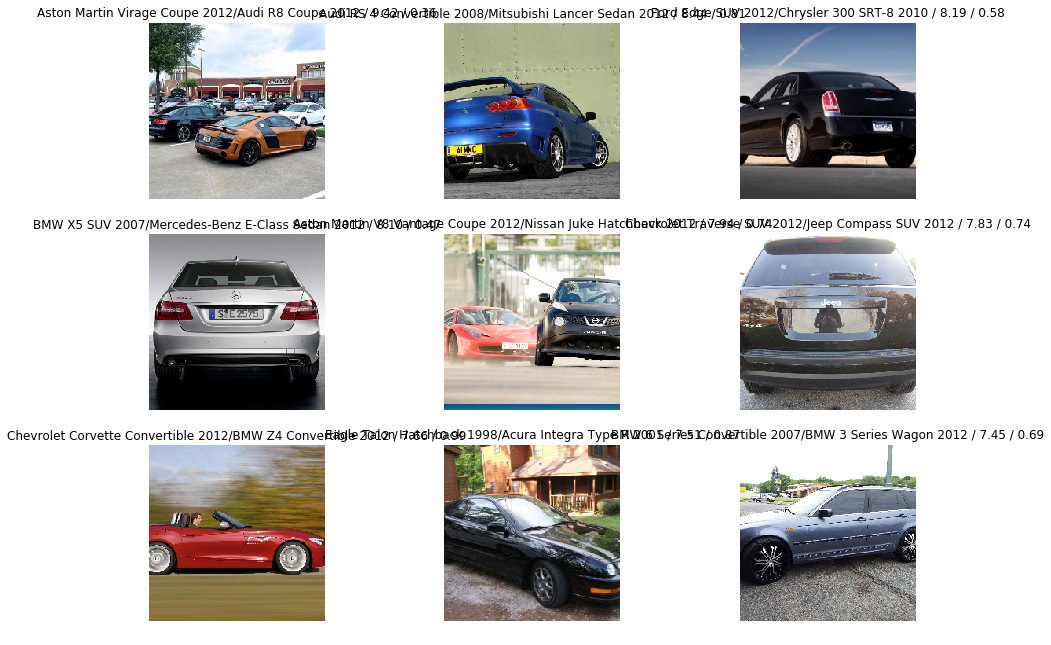

In [40]:
interp.plot_top_losses(9,figsize=(15,11))

In [41]:
doc(interp.plot_top_losses)

plot_top_losses 
 plot_top_losses ( k , largest = True , figsize = (12, 12) ) 
 
 Show images in top_losses along with their loss, label, and prediction. [source] 
 Show in docs

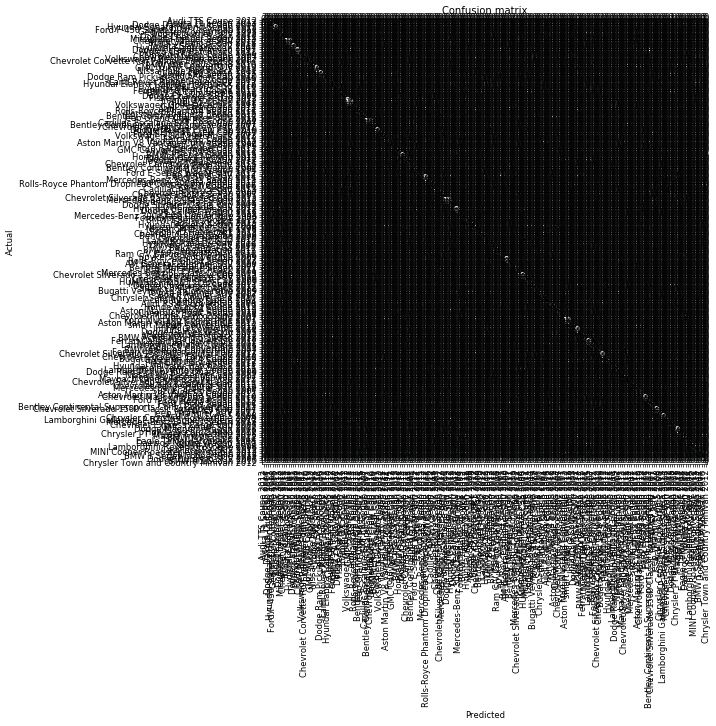

In [42]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

The confusion matrix is a mess as there are 196 classes totally.

In [43]:
interp.most_confused(min_val=2)

[('Jeep Liberty SUV 2012', 'Jeep Patriot SUV 2012', 5),
 ('Chevrolet Express Cargo Van 2007', 'GMC Savana Van 2012', 5),
 ('Chrysler 300 SRT-8 2010', 'Bentley Mulsanne Sedan 2011', 4),
 ('Spyker C8 Coupe 2009', 'Spyker C8 Convertible 2009', 4),
 ('Acura TSX Sedan 2012', 'Acura TL Sedan 2012', 4),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 4),
 ('Chevrolet Express Van 2007', 'Chevrolet Express Cargo Van 2007', 4),
 ('Audi TT Hatchback 2011', 'Audi TTS Coupe 2012', 4),
 ('Chevrolet Silverado 2500HD Regular Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  4),
 ('Dodge Dakota Club Cab 2007',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  3),
 ('Dodge Charger Sedan 2012', 'Dodge Charger SRT-8 2009', 3),
 ('BMW M6 Convertible 2010', 'BMW 6 Series Convertible 2007', 3),
 ('Chevrolet Cobalt SS 2010', 'Acura Integra Type R 2001', 3),
 ('Audi TT RS Coupe 2012', 'Audi TT Hatchback 2011', 3),
 ('HUMMER H3T Crew Cab 2010', 'HUMMER H2 SUT Crew Cab 2009', 3),
 ('GMC Canyon E

In [44]:
interp.most_confused(min_val=1)

[('Jeep Liberty SUV 2012', 'Jeep Patriot SUV 2012', 5),
 ('Chevrolet Express Cargo Van 2007', 'GMC Savana Van 2012', 5),
 ('Chrysler 300 SRT-8 2010', 'Bentley Mulsanne Sedan 2011', 4),
 ('Spyker C8 Coupe 2009', 'Spyker C8 Convertible 2009', 4),
 ('Acura TSX Sedan 2012', 'Acura TL Sedan 2012', 4),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 4),
 ('Chevrolet Express Van 2007', 'Chevrolet Express Cargo Van 2007', 4),
 ('Audi TT Hatchback 2011', 'Audi TTS Coupe 2012', 4),
 ('Chevrolet Silverado 2500HD Regular Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  4),
 ('Dodge Dakota Club Cab 2007',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  3),
 ('Dodge Charger Sedan 2012', 'Dodge Charger SRT-8 2009', 3),
 ('BMW M6 Convertible 2010', 'BMW 6 Series Convertible 2007', 3),
 ('Chevrolet Cobalt SS 2010', 'Acura Integra Type R 2001', 3),
 ('Audi TT RS Coupe 2012', 'Audi TT Hatchback 2011', 3),
 ('HUMMER H3T Crew Cab 2010', 'HUMMER H2 SUT Crew Cab 2009', 3),
 ('GMC Canyon E

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [45]:
learn.unfreeze()

In [46]:
learn.fit_one_cycle(1)

Total time: 00:37
epoch  train loss  valid loss  error_rate
1      2.854846    2.037486    0.556304    (00:37)



In [47]:
learn.load('stage-1')

In [48]:
learn.lr_find()

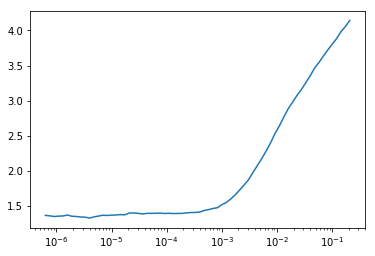

In [49]:
learn.recorder.plot()

In [50]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

Total time: 01:12
epoch  train loss  valid loss  error_rate
1      1.378893    1.616555    0.430845    (00:36)
2      1.318890    1.586845    0.416157    (00:36)



That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. Later in the course you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here.

In [51]:
data = ImageDataBunch.from_csv(path=path,csv_labels='/home/ubuntu/.fastai/data/cars_train/labels.csv',ds_tfms=get_transforms(),size=299)
data.normalize(imagenet_stats)

In [52]:
learn = ConvLearner(data,models.resnet50,metrics=error_rate)

In [53]:
learn.fit_one_cycle(5)

Total time: 04:17
epoch  train loss  valid loss  error_rate
1      4.606352    3.585274    0.795482    (00:56)
2      3.028417    2.127388    0.518430    (00:50)
3      1.878576    1.501007    0.395363    (00:50)
4      1.258725    1.165622    0.307372    (00:50)
5      0.933820    1.127946    0.302021    (00:50)



It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [54]:
learn.fit_one_cycle(5)

Total time: 04:10
epoch  train loss  valid loss  error_rate
1      1.027434    1.128449    0.302021    (00:50)
2      1.250013    1.178002    0.323424    (00:50)
3      1.000678    1.018193    0.288347    (00:50)
4      0.675939    0.885866    0.245541    (00:49)
5      0.499762    0.857510    0.238407    (00:50)



In [55]:
learn.fit_one_cycle(15)

Total time: 12:35
epoch  train loss  valid loss  error_rate
1      0.505100    0.829164    0.229489    (00:51)
2      0.484461    0.888621    0.244352    (00:50)
3      0.549684    0.914233    0.258621    (00:50)
4      0.689472    0.992604    0.272295    (00:49)
5      0.732278    0.987386    0.274673    (00:50)
6      0.701009    0.950398    0.258621    (00:51)
7      0.590192    0.918313    0.256837    (00:50)
8      0.530721    0.839047    0.222354    (00:50)
9      0.411584    0.786700    0.201546    (00:50)
10     0.355844    0.769847    0.203924    (00:50)
11     0.317489    0.747023    0.195600    (00:50)
12     0.243744    0.723498    0.192033    (00:49)
13     0.210141    0.699604    0.183115    (00:50)
14     0.189138    0.692139    0.187277    (00:50)
15     0.181600    0.690177    0.186682    (00:50)



In [56]:
learn.save('stage-1-50')

In [57]:
learn.unfreeze()
learn.fit_one_cycle(1,max_lr=slice(1e-6,1e-4))

Total time: 00:52
epoch  train loss  valid loss  error_rate
1      0.190713    0.682753    0.182521    (00:52)



In this case it doesn't, so let's go back to our previous model.

In [58]:
learn.load('stage-1-50')

In [59]:
interp = ClassificationInterpretation.from_learner(learn)

In [60]:
interp.most_confused(min_val=2)

[('Dodge Ram Pickup 3500 Crew Cab 2010',
  'Dodge Ram Pickup 3500 Quad Cab 2009',
  6),
 ('Bentley Continental GT Coupe 2012', 'Bentley Continental GT Coupe 2007', 5),
 ('Audi 100 Sedan 1994', 'Audi V8 Sedan 1994', 5),
 ('Chevrolet Silverado 2500HD Regular Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  5),
 ('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 4),
 ('Rolls-Royce Phantom Sedan 2012', 'Rolls-Royce Ghost Sedan 2012', 4),
 ('GMC Savana Van 2012', 'Chevrolet Express Van 2007', 3),
 ('HUMMER H3T Crew Cab 2010', 'HUMMER H2 SUT Crew Cab 2009', 3),
 ('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 3),
 ('Chevrolet Corvette ZR1 2012', 'Chevrolet Corvette Convertible 2012', 3),
 ('Audi S4 Sedan 2012', 'Audi S5 Coupe 2012', 3),
 ('Dodge Caliber Wagon 2007', 'Dodge Caliber Wagon 2012', 3)]

In [62]:
learn.validate()

[0.69017667, 0.18668249791640873]